Connected to pylearn (Python 3.11.13)

# 数据分析综合实践

* 数据来源：Netflix 电影与电视节目数据
* 任务目标：利用Python对Netflix平台的内容库进行深度清洗、统计与可视化，分析其全球化策略、内容偏好及时间演变趋势。


## 数据概览

1. 数据导入与概览：读取CSV文件，输出数据的维度（行数、列数）、列名、各列的数据类型，并显示前 5 行数据以了解数据结构。

In [4]:
import pandas as pd

file_path = './netflix_titles.csv'
df = pd.read_csv(file_path)

print("数据维度:")
print(f"行数: {df.shape[0]}")
print(f"列数: {df.shape[1]}")
print()

print("列名:")
print(df.columns.tolist())
print()

print("各列数据类型:")
print(df.dtypes)
print()

print("前5行数据:")
print(df.head())

数据维度:
行数: 8807
列数: 12

列名:
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

各列数据类型:
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

前5行数据:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qama

2. 缺失值统计与可视化：计算每一列的缺失值数量及缺失比例。使用 seaborn 绘制热力图（Heatmap）可视化缺失值的分布情况。

缺失值数量:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

缺失值比例 (%):
show_id          0.00
type             0.00
title            0.00
director        29.91
cast             9.37
country          9.44
date_added       0.11
release_year     0.00
rating           0.05
duration         0.03
listed_in        0.00
description      0.00
dtype: float64



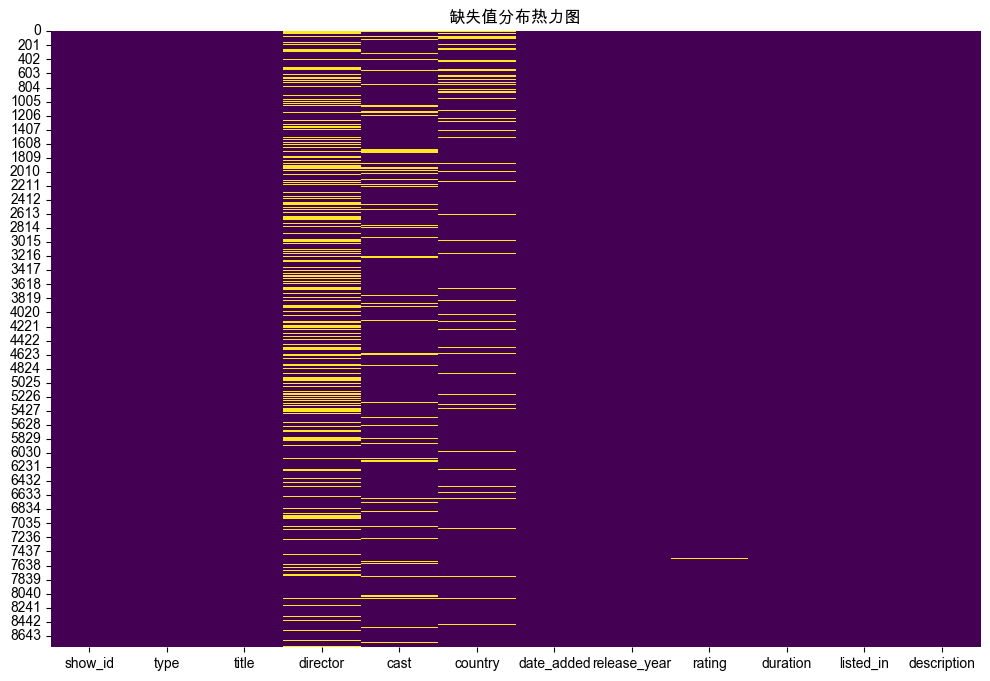

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

missing_values = df.isnull().sum()
print('缺失值数量:')
print(missing_values)
print()

missing_percentage = (df.isnull().sum() / df.shape[0]) * 100
print('缺失值比例 (%):')
print(round(missing_percentage, 2))
print()

plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('缺失值分布热力图')
plt.show()

3. 缺失值处理策略：
    1. 对于country（国家）、cast（演员）、director（导演）列的缺失值，填充为"Unknown"。
    2. 对于 rating（分级）、duration（时长）列的缺失值，如果数量极少（<1%），则直接删除对应的行。

In [6]:
print("原始数据信息:")
print(f"数据形状: {df.shape}")
print()

print("各列缺失值情况:")
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / df.shape[0]) * 100
missing_df = pd.DataFrame({'缺失值数量': missing_values, '缺失比例(%)': round(missing_percentage, 2)})
print(missing_df)
print()

print("1. 对country、cast、director列的缺失值填充为\"Unknown\"")
fill_columns = ['country', 'cast', 'director']
df[fill_columns] = df[fill_columns].fillna('Unknown')

print("填充后这三列的缺失值情况:")
print(df[fill_columns].isnull().sum())
print()

print("2. 检查rating和duration列的缺失值比例:")
print(f"rating列缺失比例: {round((df['rating'].isnull().sum() / df.shape[0]) * 100, 2)}%")
print(f"duration列缺失比例: {round((df['duration'].isnull().sum() / df.shape[0]) * 100, 2)}%")
print()

drop_columns = ['rating', 'duration']
for col in drop_columns:
    missing_pct = (df[col].isnull().sum() / df.shape[0]) * 100
    if missing_pct < 1:
        print(f"删除{col}列中的缺失值行...")
        df = df.dropna(subset=[col])
        print(f"删除后数据形状: {df.shape}")
    else:
        print(f"{col}列缺失比例({round(missing_pct, 2)}%)超过1%，不进行删除操作")

print()

print("处理后的数据信息:")
print(f"数据形状: {df.shape}")
print()
print("处理后各列缺失值情况:")
missing_values_after = df.isnull().sum()
missing_percentage_after = (df.isnull().sum() / df.shape[0]) * 100
missing_df_after = pd.DataFrame({'缺失值数量': missing_values_after, '缺失比例(%)': round(missing_percentage_after, 2)})
print(missing_df_after)

output_path = './netflix_titles_cleaned.csv'
df.to_csv(output_path, index=False)
print(f"\n处理后的数据已保存到: {output_path}")

原始数据信息:
数据形状: (8807, 12)

各列缺失值情况:
              缺失值数量  缺失比例(%)
show_id           0     0.00
type              0     0.00
title             0     0.00
director       2634    29.91
cast            825     9.37
country         831     9.44
date_added       10     0.11
release_year      0     0.00
rating            4     0.05
duration          3     0.03
listed_in         0     0.00
description       0     0.00

1. 对country、cast、director列的缺失值填充为"Unknown"
填充后这三列的缺失值情况:
country     0
cast        0
director    0
dtype: int64

2. 检查rating和duration列的缺失值比例:
rating列缺失比例: 0.05%
duration列缺失比例: 0.03%

删除rating列中的缺失值行...
删除后数据形状: (8803, 12)
删除duration列中的缺失值行...
删除后数据形状: (8800, 12)

处理后的数据信息:
数据形状: (8800, 12)

处理后各列缺失值情况:
              缺失值数量  缺失比例(%)
show_id           0     0.00
type              0     0.00
title             0     0.00
director          0     0.00
cast              0     0.00
country           0     0.00
date_added       10     0.11
release_year      0     0.00
rating            0   

4. 时间类型转换：将date_added（上架日期）列转换为标准的datetime格式。如果是无法解析的格式，需进行清洗或处理异常值。

In [7]:
print("原始数据信息:")
print(f"数据形状: {df.shape}")
print()

print("date_added列的基本信息:")
print(f"数据类型: {df['date_added'].dtype}")
print(f"非空值数量: {df['date_added'].count()}")
print(f"缺失值数量: {df['date_added'].isnull().sum()}")
print()

print("date_added列的示例值:")
print(df['date_added'].dropna().head(10))
print()

print("处理缺失值...")
df['date_added'] = df['date_added'].fillna('Unknown')
print(f"填充后date_added列非空值数量: {df['date_added'].count()}")
print(f"填充后date_added列值为'Unknown'的数量: {df[df['date_added'] == 'Unknown'].shape[0]}")
print()

print("将date_added列转换为datetime格式...")
df['date_added'] = pd.to_datetime(df['date_added'], format='%d-%b-%y', errors='coerce')

print(f"转换后date_added列数据类型: {df['date_added'].dtype}")
print(f"转换后有效datetime值数量: {df['date_added'].count()}")
print(f"转换后NaT值数量: {df['date_added'].isna().sum()}")
print()

print("4. 转换后的date_added列示例值:")
print(df['date_added'].dropna().head(10))
print()

output_path = './netflix_titles_cleaned.csv'
df.to_csv(output_path, index=False)
print("\n转换完成！")

原始数据信息:
数据形状: (8800, 12)

date_added列的基本信息:
数据类型: object
非空值数量: 8790
缺失值数量: 10

date_added列的示例值:
0    25-Sep-21
1    24-Sep-21
2    24-Sep-21
3    24-Sep-21
4    24-Sep-21
5    24-Sep-21
6    24-Sep-21
7    24-Sep-21
8    24-Sep-21
9    24-Sep-21
Name: date_added, dtype: object

处理缺失值...
填充后date_added列非空值数量: 8800
填充后date_added列值为'Unknown'的数量: 10

将date_added列转换为datetime格式...
转换后date_added列数据类型: datetime64[ns]
转换后有效datetime值数量: 8702
转换后NaT值数量: 98

4. 转换后的date_added列示例值:
0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
5   2021-09-24
6   2021-09-24
7   2021-09-24
8   2021-09-24
9   2021-09-24
Name: date_added, dtype: datetime64[ns]


转换完成！


5. 时间特征提取：从date_added中提取年份和月份，分别创建两个新列year_added（上架年份）和month_added（上架月份）。

In [8]:
print("原始数据信息:")
print(f"数据形状: {df.shape}")
print()

print("date_added列的数据类型:")
print(f"数据类型: {df['date_added'].dtype}")
print()

print("确保date_added列是datetime格式...")
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
print(f"转换后数据类型: {df['date_added'].dtype}")
print()

print("从date_added中提取年份和月份...")
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
print()

print("新创建的year_added和month_added列:")
print(df[['date_added', 'year_added', 'month_added']].head(10))
print()

print("新列的基本信息:")
print(f"year_added数据类型: {df['year_added'].dtype}")
print(f"month_added数据类型: {df['month_added'].dtype}")
print(f"year_added非空值数量: {df['year_added'].count()}")
print(f"month_added非空值数量: {df['month_added'].count()}")
print()

output_path = './netflix_titles_cleaned.csv'
df.to_csv(output_path, index=False)
print(f"\n更新后的数据已保存到: {output_path}")
print("提取年份和月份完成！")

原始数据信息:
数据形状: (8800, 12)

date_added列的数据类型:
数据类型: datetime64[ns]

确保date_added列是datetime格式...
转换后数据类型: datetime64[ns]

从date_added中提取年份和月份...

新创建的year_added和month_added列:
  date_added  year_added  month_added
0 2021-09-25      2021.0          9.0
1 2021-09-24      2021.0          9.0
2 2021-09-24      2021.0          9.0
3 2021-09-24      2021.0          9.0
4 2021-09-24      2021.0          9.0
5 2021-09-24      2021.0          9.0
6 2021-09-24      2021.0          9.0
7 2021-09-24      2021.0          9.0
8 2021-09-24      2021.0          9.0
9 2021-09-24      2021.0          9.0

新列的基本信息:
year_added数据类型: float64
month_added数据类型: float64
year_added非空值数量: 8702
month_added非空值数量: 8702


更新后的数据已保存到: ./netflix_titles_cleaned.csv
提取年份和月份完成！


## 数据清洗

1. 时长单位清洗与标准化：duration列包含"90 min"和"1 Season"两种格式。请拆分该列，创建两个新列：
    * duration_num：提取数值部分（整数）。
    * duration_unit：提取单位部分（清洗为 'min' 或 'season'）。

In [9]:
input_path = './netflix_titles_cleaned.csv'
df = pd.read_csv(input_path)

def process_duration(row):
    parts = row.split()
    if len(parts) >= 2:
        num = int(parts[0])
        unit = parts[1].lower()
        # 标准化单位
        if 'min' in unit:
            unit = 'min'
        elif 'season' in unit:
            unit = 'season'
        else:
            unit = 'unknown'
        return num, unit
    else:
        return 0, 'unknown'

df[['duration_num', 'duration_unit']] = df['duration'].apply(
    lambda x: pd.Series(process_duration(x))
)

print("标准化后的duration_unit列示例:")
print(df['duration_unit'].value_counts())
print()

print("新创建的duration_num和duration_unit列:")
print(df[['duration', 'duration_num', 'duration_unit']].head(5))
print()

output_path = './netflix_titles_cleaned.csv'
df.to_csv(output_path, index=False)

print(f"duration_num缺失值数量: {df['duration_num'].isna().sum()}")
print(f"duration_unit缺失值数量: {df['duration_unit'].isna().sum()}")
print(f"duration_unit为'unknown'的数量: {df[df['duration_unit'] == 'unknown'].shape[0]}")

# 内容分类二值化：Movie=0, TV Show=1
df['type_encoded'] = df['type'].map({'Movie': 0, 'TV Show': 1})

print("\n内容分类二值化结果:")
print(df['type_encoded'].value_counts())
print()

print("转换后的type和type_encoded列:")
print(df[['type', 'type_encoded']].head(10))
print()

# 保存包含type_encoded的数据
df.to_csv(output_path, index=False)
print(f"包含type_encoded的数据已保存到: {output_path}")

标准化后的duration_unit列示例:
duration_unit
min       6126
season    2674
Name: count, dtype: int64

新创建的duration_num和duration_unit列:
    duration  duration_num duration_unit
0     90 min            90           min
1  2 Seasons             2        season
2   1 Season             1        season
3   1 Season             1        season
4  2 Seasons             2        season

duration_num缺失值数量: 0
duration_unit缺失值数量: 0
duration_unit为'unknown'的数量: 0

内容分类二值化结果:
type_encoded
0    6126
1    2674
Name: count, dtype: int64

转换后的type和type_encoded列:
      type  type_encoded
0    Movie             0
1  TV Show             1
2  TV Show             1
3  TV Show             1
4  TV Show             1
5  TV Show             1
6    Movie             0
7    Movie             0
8  TV Show             1
9    Movie             0

包含type_encoded的数据已保存到: ./netflix_titles_cleaned.csv


2. 内容分类二值化：针对type列（Movie/TV Show），将其转换为数值编码`Movie=0, TV Show=1`。

In [10]:
input_path = './netflix_titles_cleaned.csv'
df = pd.read_csv(input_path)

print("原始type列分布:")
print(df['type'].value_counts())
print()

print("原始type列示例:")
print(df['type'].head(5))
print()

df['type_encoded'] = df['type'].map({'Movie': 0, 'TV Show': 1})

print("二值化后的type_encoded列分布:")
print(df['type_encoded'].value_counts())
print()

print("转换后的type和type_encoded列示例:")
print(df[['type', 'type_encoded']].head(5))
print()

output_path = './netflix_titles_cleaned.csv'
df.to_csv(output_path, index=False)

print("数据质量验证:")
print(f"type_encoded数据类型: {df['type_encoded'].dtype}")
print(f"type_encoded非空值数量: {df['type_encoded'].count()}")
print(f"type_encoded缺失值数量: {df['type_encoded'].isna().sum()}")
print()

原始type列分布:
type
Movie      6126
TV Show    2674
Name: count, dtype: int64

原始type列示例:
0      Movie
1    TV Show
2    TV Show
3    TV Show
4    TV Show
Name: type, dtype: object

二值化后的type_encoded列分布:
type_encoded
0    6126
1    2674
Name: count, dtype: int64

转换后的type和type_encoded列示例:
      type  type_encoded
0    Movie             0
1  TV Show             1
2  TV Show             1
3  TV Show             1
4  TV Show             1

数据质量验证:
type_encoded数据类型: int64
type_encoded非空值数量: 8800
type_encoded缺失值数量: 0



3. 多值列处理（国家）：country列中很多内容涉及多个国家（如 "United States, India"）。请编写函数，仅提取第一个国家作为主制作国家，存入新列primary_country。

In [11]:
input_path = './netflix_titles_cleaned.csv'
df = pd.read_csv(input_path)

print("原始country列中包含多个国家的示例:")
multi_country = df[df['country'].str.contains(',', na=False)]
print(multi_country['country'].head(5))
print()

def extract_primary_country(country_str):
    if pd.isna(country_str) or country_str.strip() == '':
        return 'Unknown'
    return country_str.split(',')[0].strip()

df['primary_country'] = df['country'].apply(extract_primary_country)

print("主制作国家分布（前20个）:")
print(df['primary_country'].value_counts().head(5))
print()

output_path = './netflix_titles_cleaned.csv'
df.to_csv(output_path, index=False)

print("数据质量验证:")
print(f"primary_country数据类型: {df['primary_country'].dtype}")
print(f"primary_country非空值数量: {df['primary_country'].count()}")
print(f"primary_country唯一值数量: {df['primary_country'].nunique()}")
print(f"primary_country为'Unknown'的数量: {df[df['primary_country'] == 'Unknown'].shape[0]}")

原始country列中包含多个国家的示例:
7     United States, Ghana, Burkina Faso, United Kin...
12                              Germany, Czech Republic
29                         United States, India, France
38                         China, Canada, United States
46                   South Africa, United States, Japan
Name: country, dtype: object

主制作国家分布（前20个）:
primary_country
United States     3208
India             1008
Unknown            830
United Kingdom     628
Canada             271
Name: count, dtype: int64

数据质量验证:
primary_country数据类型: object
primary_country非空值数量: 8800
primary_country唯一值数量: 87
primary_country为'Unknown'的数量: 830


4. 多值列展开（类型标签）：listed_in 列包含多个题材标签。请统计包含标签数量最多的前 5 部影片，并计算整个数据集中所有影片平均拥有的标签数量。

In [12]:
input_path = './netflix_titles_cleaned.csv'
df = pd.read_csv(input_path)

df['tag_count'] = df['listed_in'].str.split(',').apply(len)
top_tagged_movies = df.sort_values('tag_count', ascending=False).head(5)
average_tags = df['tag_count'].mean()

print("标签数量最多的前5部影片：")
for index, row in top_tagged_movies.iterrows():
    print(f"标题: {row['title']} | 类型: {row['type']} | 标签数量: {row['tag_count']} | 标签: {row['listed_in']}")

print(f"\n所有影片平均拥有的标签数量: {average_tags:.2f}")

print("\n数据质量验证:")
print(f"tag_count数据类型: {df['tag_count'].dtype}")
print(f"tag_count非空值数量: {df['tag_count'].count()}")
print(f"标签数量范围: {df['tag_count'].min()} - {df['tag_count'].max()}")

标签数量最多的前5部影片：
标题: Age of Tanks | 类型: TV Show | 标签数量: 3 | 标签: Docuseries, International TV Shows, Science & Nature TV
标题: Silvana Sin Lana | 类型: TV Show | 标签数量: 3 | 标签: Romantic TV Shows, Spanish-Language TV Shows, TV Comedies
标题: Arjun: The Warrior Prince | 类型: Movie | 标签数量: 3 | 标签: Action & Adventure, Dramas, International Movies
标题: ABCD 2 | 类型: Movie | 标签数量: 3 | 标签: Dramas, International Movies, Music & Musicals
标题: Aagey Se Right | 类型: Movie | 标签数量: 3 | 标签: Comedies, International Movies, Music & Musicals

所有影片平均拥有的标签数量: 2.19

数据质量验证:
tag_count数据类型: int64
tag_count非空值数量: 8800
标签数量范围: 1 - 3


5. 上架滞后性分析：创建一个新列lag_years，计算公式为year_added减去release_year（上映年份）。若结果为负数，将其修正为0（视为同年上架）

In [13]:
input_path = './netflix_titles_cleaned.csv'
df = pd.read_csv(input_path)

df['lag_years'] = df['year_added'] - df['release_year']
df['lag_years'] = df['lag_years'].apply(lambda x: max(0, x))

print("上架滞后性分析结果（前10行）：")
print(df[['title', 'type', 'release_year', 'year_added', 'lag_years']].head(5))

print("\n上架滞后性统计：")
print(f"平均上架滞后年数: {df['lag_years'].mean():.2f}")
print(f"最大上架滞后年数: {df['lag_years'].max()}")
print(f"最小上架滞后年数: {df['lag_years'].min()}")
print(f"同年上架的影片数量: {df[df['lag_years'] == 0].shape[0]}")
print(f"滞后上架的影片数量: {df[df['lag_years'] > 0].shape[0]}")

output_path = './netflix_titles_cleaned.csv'
df.to_csv(output_path, index=False)
print(f"\n数据已保存到 {output_path}")

上架滞后性分析结果（前10行）：
                   title     type  release_year  year_added  lag_years
0   Dick Johnson Is Dead    Movie          2020      2021.0        1.0
1          Blood & Water  TV Show          2021      2021.0        0.0
2              Ganglands  TV Show          2021      2021.0        0.0
3  Jailbirds New Orleans  TV Show          2021      2021.0        0.0
4           Kota Factory  TV Show          2021      2021.0        0.0

上架滞后性统计：
平均上架滞后年数: 4.64
最大上架滞后年数: 93.0
最小上架滞后年数: 0.0
同年上架的影片数量: 3332
滞后上架的影片数量: 5468

数据已保存到 ./netflix_titles_cleaned.csv


## 统计分析

1. 统计Movie和TV Show的数量，并计算各自的百分比，使用matplotlib绘制饼图（Pie Chart）展示两者比例，需标注百分比数值。

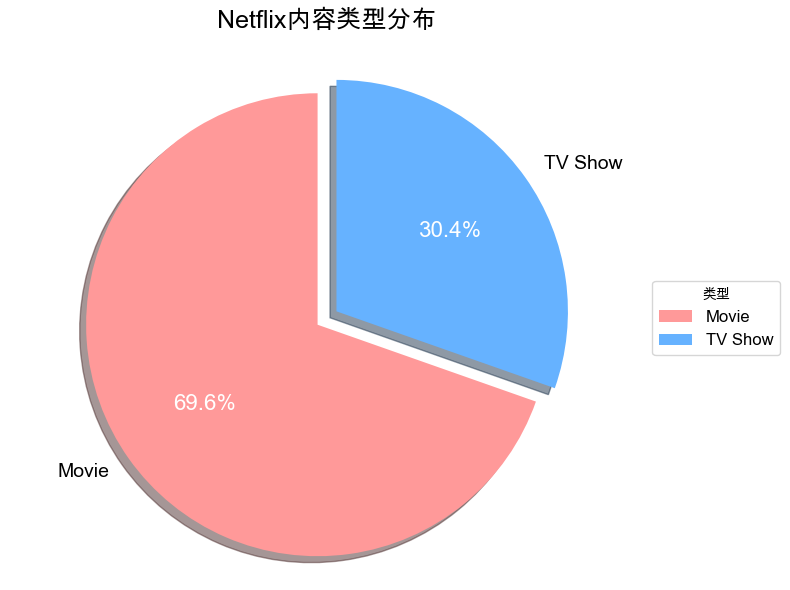

In [14]:
input_path = './netflix_titles_cleaned.csv'
df = pd.read_csv(input_path)

type_counts = df['type'].value_counts()
type_percentages = (type_counts / type_counts.sum()) * 100

fig, ax = plt.subplots(figsize=(8, 6))
colors = ['#FF9999', '#66B2FF']
explode = (0.05, 0.05)  
wedges, texts, autotexts = ax.pie(type_counts.values,
                                  explode=explode,
                                  labels=type_counts.index,
                                  colors=colors,
                                  autopct='%1.1f%%',
                                  shadow=True,
                                  startangle=90,
                                  textprops={'fontsize': 14})

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(16)
    autotext.set_fontweight('bold')

ax.set_title('Netflix内容类型分布', fontsize=18, fontweight='bold', pad=20)
ax.axis('equal')
plt.legend(wedges, type_counts.index, title="类型", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)
plt.tight_layout()
plt.show()

2. 国家产出排行：基于清洗后的 primary_country 列，统计内容数量最多的前10个国家。

内容数量最多的前10个国家：
------------------------------------------------------------
国家                   内容数量            占比        
------------------------------------------------------------
1. United States      3208            51.52%
2. India              1008            16.19%
3. United Kingdom     628             10.09%
4. Canada             271             4.35%
5. Japan              258             4.14%
6. France             212             3.40%
7. South Korea        211             3.39%
8. Spain              181             2.91%
9. Mexico             134             2.15%
10. Australia          116             1.86%
------------------------------------------------------------
合计                   6227            100.00%


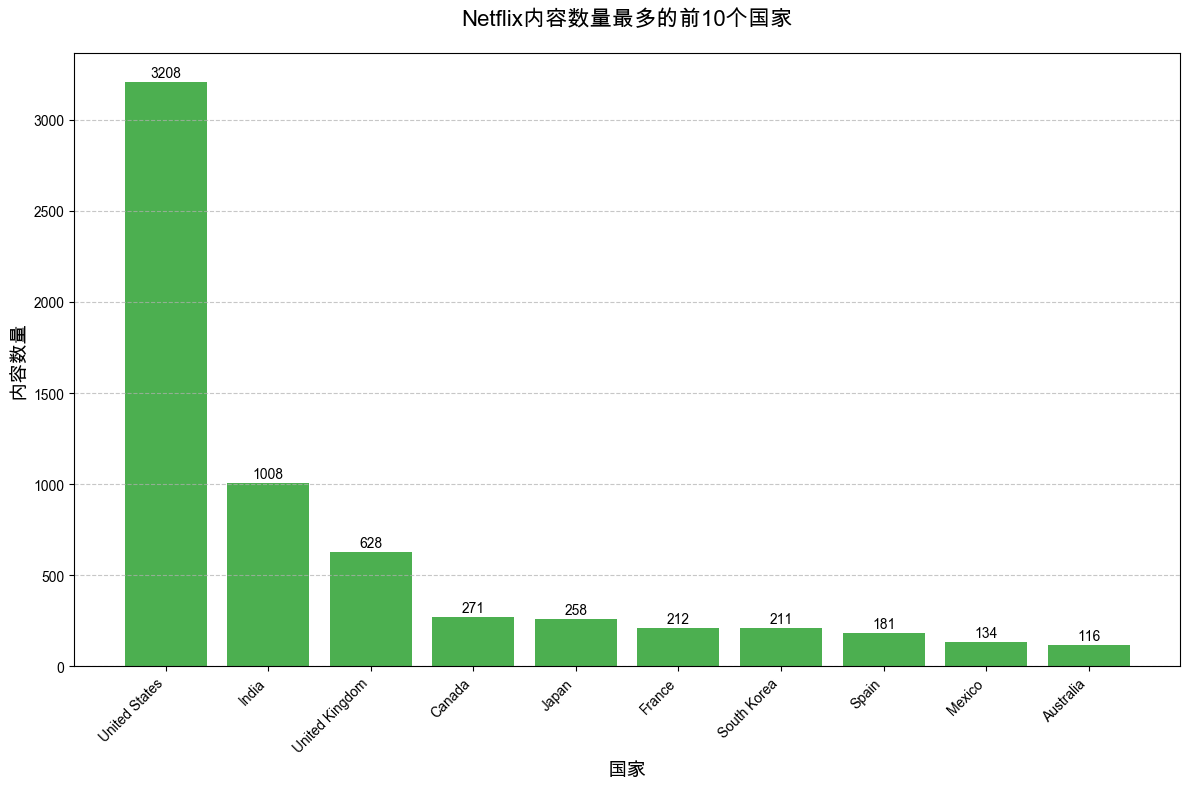

In [15]:
input_path = './netflix_titles_cleaned.csv'
df = pd.read_csv(input_path)

top_10_countries = df[df['primary_country'] != 'Unknown']['primary_country'].value_counts().head(10)
total_without_unknown = top_10_countries.sum()
country_percentages = (top_10_countries / total_without_unknown) * 100

print("内容数量最多的前10个国家：")
print("-" * 60)
print(f"{'国家':<20} {'内容数量':<15} {'占比':<10}")
print("-" * 60)

for i, (country, count) in enumerate(top_10_countries.items(), 1):
    percentage = country_percentages[country]
    print(f"{i}. {country:<18} {count:<15} {percentage:.2f}%")

print("-" * 60)
print(f"{'合计':<20} {total_without_unknown:<15} 100.00%")

fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(range(len(top_10_countries)), top_10_countries.values, color='#4CAF50')
ax.set_xticks(range(len(top_10_countries)))
ax.set_xticklabels(top_10_countries.index, rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 10,
            f'{int(height)}',
            ha='center', va='bottom')

ax.set_title('Netflix内容数量最多的前10个国家', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('国家', fontsize=14)
ax.set_ylabel('内容数量', fontsize=14)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

3. 年份趋势分析：统计每一年（year_added）上架的内容总数。

每一年上架的内容总数：
----------------------------------------
年份         内容数量           
----------------------------------------
2008       2              
2009       2              
2010       1              
2011       13             
2012       3              
2013       10             
2014       23             
2015       73             
2016       415            
2017       1161           
2018       1624           
2019       1999           
2020       1878           
2021       1498           
----------------------------------------
总计         8702           


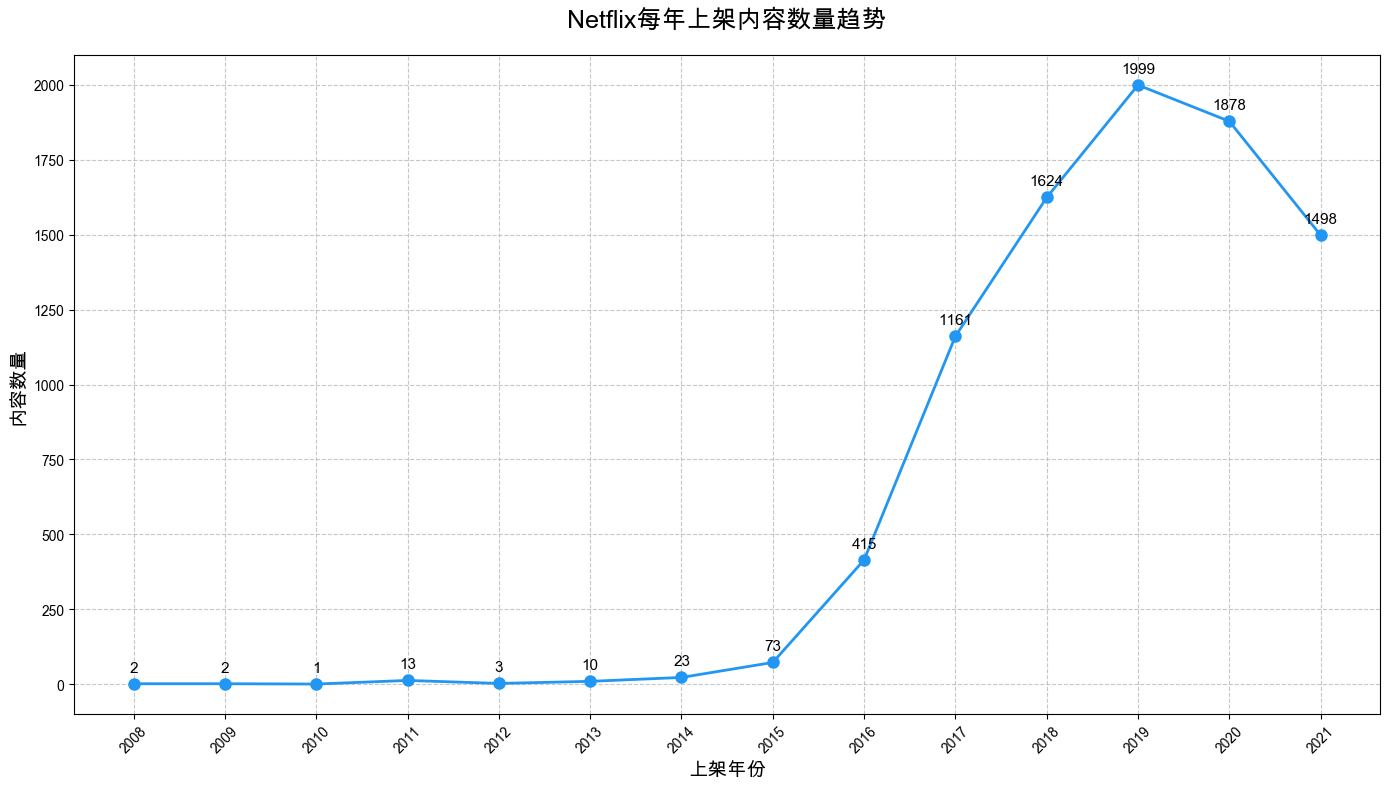

In [16]:
input_path = './netflix_titles_cleaned.csv'
df = pd.read_csv(input_path)

year_counts = df['year_added'].value_counts().sort_index()

print("每一年上架的内容总数：")
print("-" * 40)
print(f"{'年份':<10} {'内容数量':<15}")
print("-" * 40)

for year, count in year_counts.items():
    print(f"{int(year):<10} {count:<15}")

print("-" * 40)
print(f"{'总计':<10} {year_counts.sum():<15}")

fig, ax = plt.subplots(figsize=(14, 8))
years = [int(year) for year in year_counts.index]
ax.plot(years, year_counts.values, marker='o', linewidth=2, markersize=8, color='#2196F3')
for i, (year, count) in enumerate(zip(years, year_counts.values)):
    ax.text(year, count + 30, f'{count}', ha='center', va='bottom', fontsize=11)
ax.set_title('Netflix每年上架内容数量趋势', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('上架年份', fontsize=14)
ax.set_ylabel('内容数量', fontsize=14)
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45)
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

4. 热门分级统计：统计不同分级（rating，如TV-MA, PG-13 等）的内容数量，并按数量降序排列。

热门分级统计：
----------------------------------------
分级              内容数量            百分比       
----------------------------------------
TV-MA           3207            36.44%
TV-14           2160            24.55%
TV-PG           863             9.81%
R               799             9.08%
PG-13           490             5.57%
TV-Y7           334             3.80%
TV-Y            307             3.49%
PG              287             3.26%
TV-G            220             2.50%
NR              80              0.91%
G               41              0.47%
TV-Y7-FV        6               0.07%
NC-17           3               0.03%
UR              3               0.03%
----------------------------------------
总计              8800            100.00%


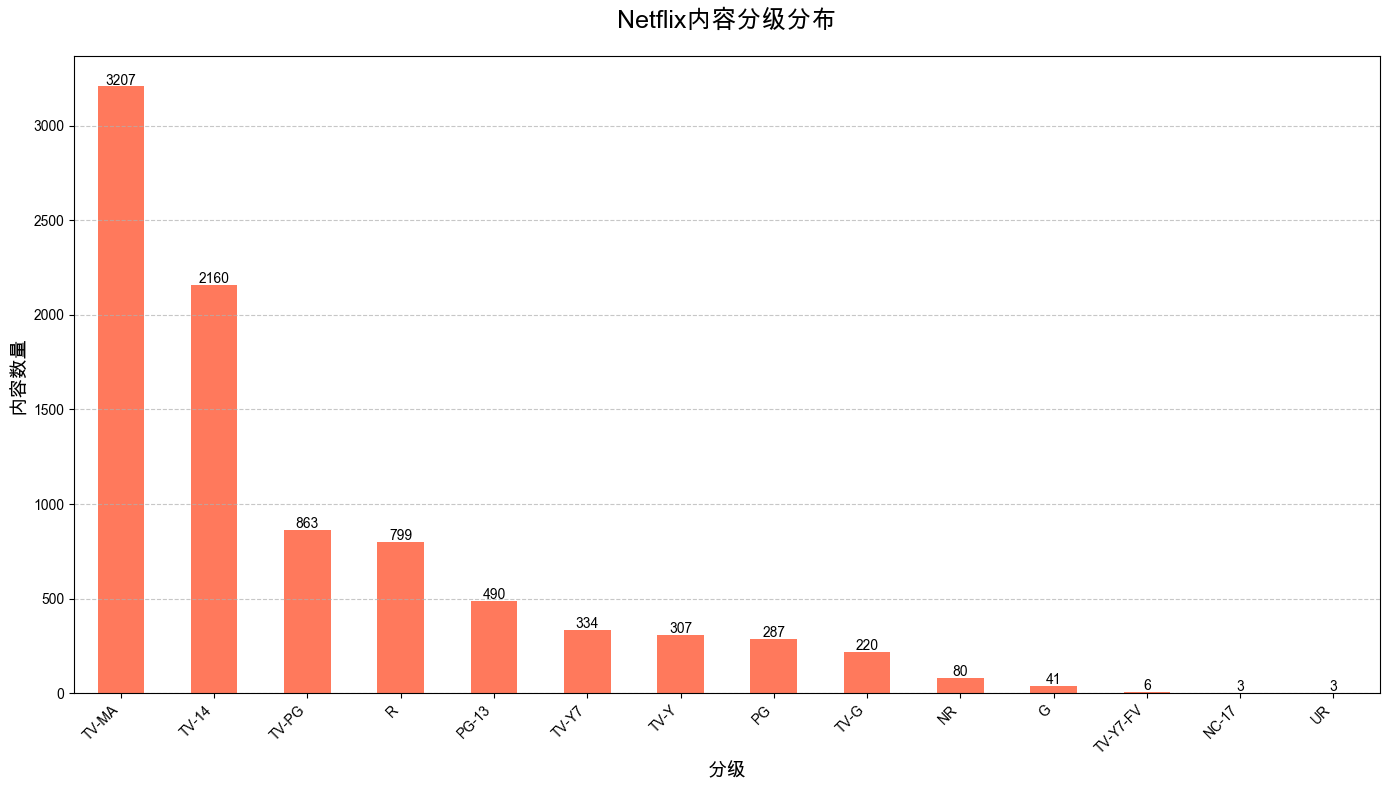

In [17]:
input_path = './netflix_titles_cleaned.csv'
df = pd.read_csv(input_path)

print("热门分级统计：")
print("-" * 40)
rating_counts = df['rating'].value_counts().sort_values(ascending=False)

print(f"{'分级':<15} {'内容数量':<15} {'百分比':<10}")
print("-" * 40)

for rating, count in rating_counts.items():
    percentage = (count / rating_counts.sum()) * 100
    print(f"{rating:<15} {count:<15} {percentage:.2f}%")

print("-" * 40)
print(f"{'总计':<15} {rating_counts.sum():<15} 100.00%")

plt.figure(figsize=(14, 8))
ax = rating_counts.plot(kind='bar', color='#FF5733', alpha=0.8)
plt.title('Netflix内容分级分布', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('分级', fontsize=14)
plt.ylabel('内容数量', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(rating_counts.values):
    ax.text(i, v + 10, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

5. 最勤劳的导演：统计 director 列（需排除 "Unknown"），找出执导作品数量最多的前 10 位导演。

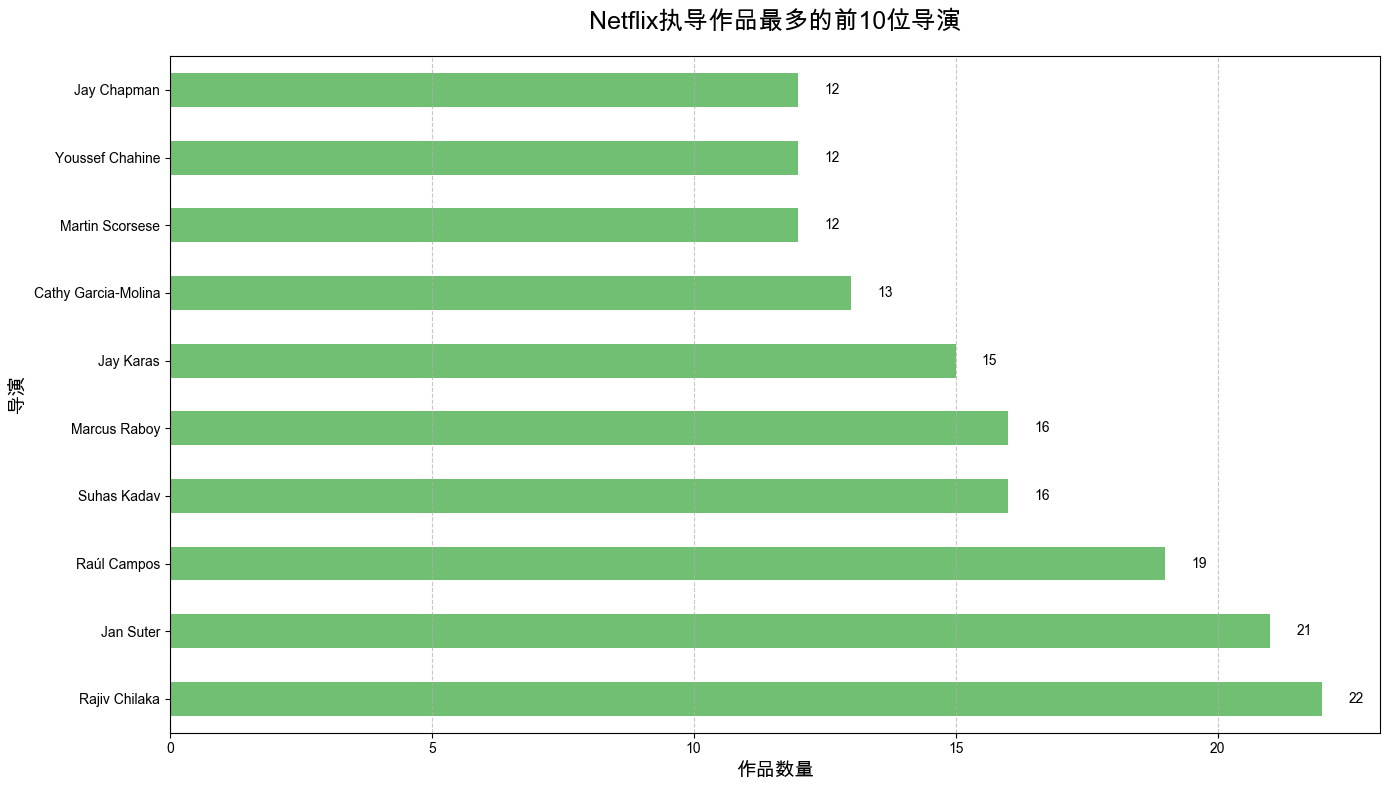

In [18]:
input_path = './netflix_titles_cleaned.csv'
df = pd.read_csv(input_path)

filtered_df = df[df['director'] != 'Unknown']
director_list = []
for directors in filtered_df['director'].dropna():
    if pd.notna(directors):
        # 拆分多个导演
        director_list.extend([d.strip() for d in directors.split(',')])

director_counts = pd.Series(director_list).value_counts().head(10)

plt.figure(figsize=(14, 8))
ax = director_counts.plot(kind='barh', color='#4CAF50', alpha=0.8)
plt.title('Netflix执导作品最多的前10位导演', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('作品数量', fontsize=14)
plt.ylabel('导演', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, v in enumerate(director_counts.values):
    ax.text(v + 0.5, i, str(v), ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 业务分析

1. 内容上架的热力图：构建一个透视表（Pivot Table），行索引为 month_added，列索引为year_added（取最近10年），值为内容的数量。使用seaborn绘制热力图，分析Netflix偏好在每年的几月份集中上架新内容。

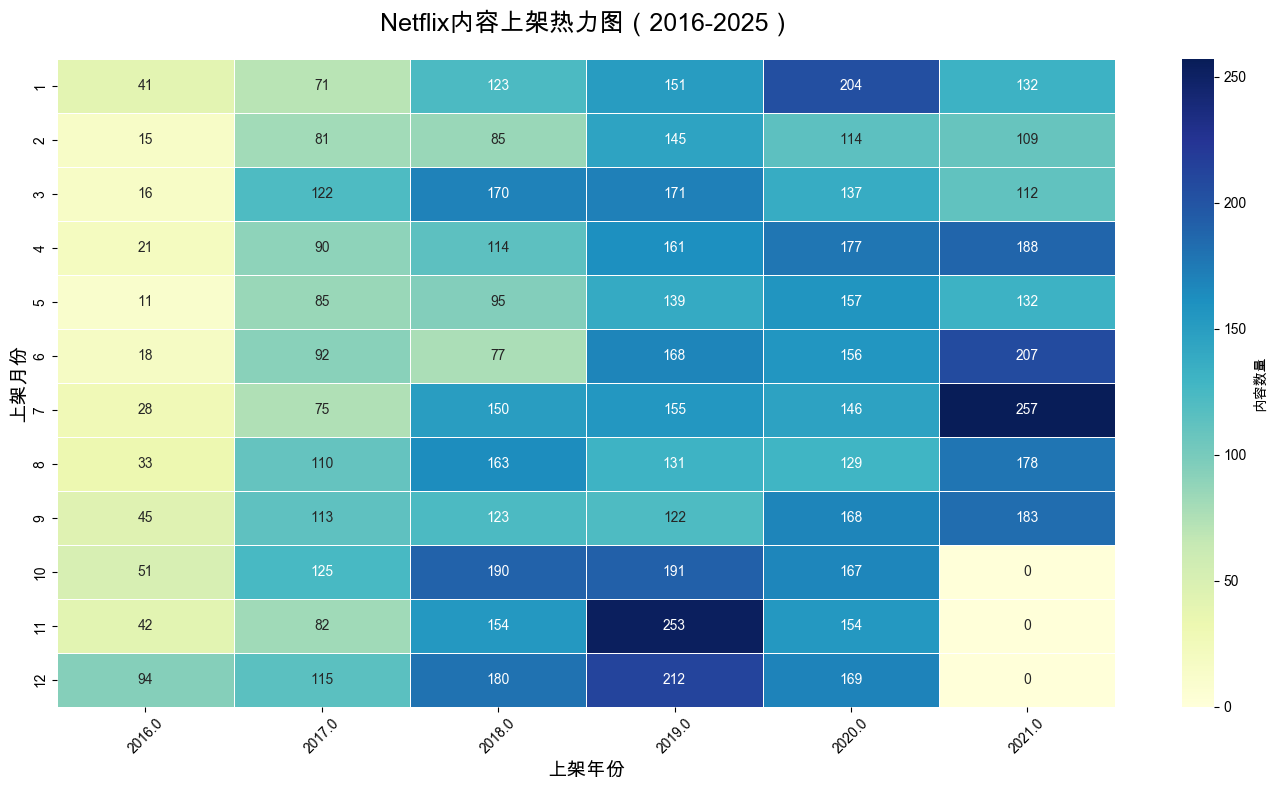

In [19]:
input_path = './netflix_titles_cleaned.csv'
df = pd.read_csv(input_path)

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

current_year = pd.Timestamp.now().year
start_year = current_year - 9  
filtered_df = df[(df['year_added'] >= start_year) & (df['year_added'] <= current_year)]

pivot_table = filtered_df.pivot_table(
    values='show_id',
    index='month_added',
    columns='year_added',
    aggfunc='count',
    fill_value=0
)

plt.figure(figsize=(14, 8))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt='d',
    cmap='YlGnBu',
    cbar_kws={'label': '内容数量'},
    linewidths=0.5
)

plt.title(f'Netflix内容上架热力图（{start_year}-{current_year}）', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('上架年份', fontsize=14)
plt.ylabel('上架月份', fontsize=14)

plt.xticks(rotation=45)
plt.yticks([i+0.5 for i in range(12)], [str(i+1) for i in range(12)])

plt.tight_layout()
plt.show()

2. 电影时长分布：仅筛选 type 为 "Movie" 的数据，使用 seaborn 的 histplot 或 kdeplot 绘制电影时长（duration_num）的分布曲线，并标出平均时长。

电影时长分布分析：
--------------------------------------------------
总电影数量：6126
平均电影时长：99.6 分钟
最短电影时长：3 分钟
最长电影时长：312 分钟
电影时长中位数：98.0 分钟
--------------------------------------------------


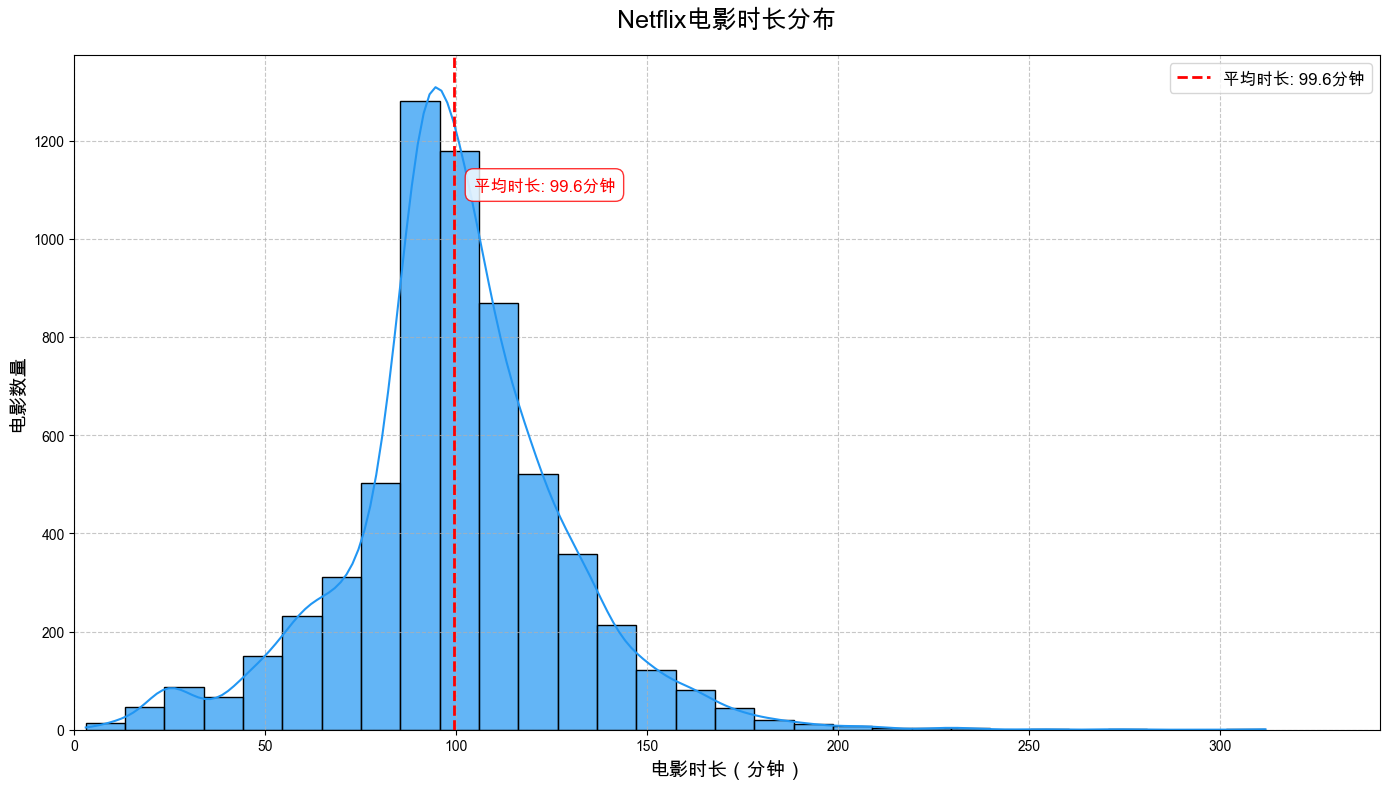


分析结论：
----------------------------------------
Netflix电影平均时长适中（99.6分钟），符合主流电影长度。

各时长区间电影数量：
----------------------------------------
0-60分钟         ：486        部 (7.9%)
61-90分钟        ：1503       部 (24.5%)
91-120分钟       ：2995       部 (48.9%)
121-150分钟      ：897        部 (14.6%)
150分钟以上        ：245        部 (4.0%)


In [24]:
input_path = './netflix_titles_cleaned.csv'
df = pd.read_csv(input_path)

movie_df = df[df['type'] == 'Movie'].copy()
if 'duration_num' not in movie_df.columns:
    movie_df['duration_num'] = movie_df['duration'].str.extract('(\d+)').astype(float)

average_duration = movie_df['duration_num'].mean()

print("电影时长分布分析：")
print("-" * 50)
print(f"总电影数量：{len(movie_df)}")
print(f"平均电影时长：{average_duration:.1f} 分钟")
print(f"最短电影时长：{movie_df['duration_num'].min()} 分钟")
print(f"最长电影时长：{movie_df['duration_num'].max()} 分钟")
print(f"电影时长中位数：{movie_df['duration_num'].median()} 分钟")
print("-" * 50)

plt.figure(figsize=(14, 8))
sns.histplot(
    data=movie_df,
    x='duration_num',
    bins=30,
    kde=True,
    color='#2196F3',
    edgecolor='black',
    alpha=0.7
)

plt.axvline(x=average_duration, color='red', linestyle='--', linewidth=2, label=f'平均时长: {average_duration:.1f}分钟')
plt.title('Netflix电影时长分布', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('电影时长（分钟）', fontsize=14)
plt.ylabel('电影数量', fontsize=14)
plt.xlim(0, movie_df['duration_num'].max() + 30)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

plt.text(average_duration + 5, plt.ylim()[1] * 0.8, 
         f'平均时长: {average_duration:.1f}分钟', 
         color='red', fontweight='bold', fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='red', boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()

# 分析结果
print("\n分析结论：")
print("-" * 40)
if average_duration < 90:
    print(f"Netflix电影平均时长较短（{average_duration:.1f}分钟），适合快速观看。")
elif average_duration < 120:
    print(f"Netflix电影平均时长适中（{average_duration:.1f}分钟），符合主流电影长度。")
else:
    print(f"Netflix电影平均时长较长（{average_duration:.1f}分钟），可能以剧情片或史诗片为主。")

# 统计不同时长区间的电影数量
duration_bins = [0, 60, 90, 120, 150, float('inf')]
bin_labels = ['0-60分钟', '61-90分钟', '91-120分钟', '121-150分钟', '150分钟以上']
movie_df['duration_range'] = pd.cut(movie_df['duration_num'], bins=duration_bins, labels=bin_labels)
duration_counts = movie_df['duration_range'].value_counts().sort_index()

print("\n各时长区间电影数量：")
print("-" * 40)
for duration_range, count in duration_counts.items():
    percentage = (count / len(movie_df)) * 100
    print(f"{duration_range:<15}：{count:<10} 部 ({percentage:.1f}%)")

3. 不同国家的题材偏好：选取内容最多的前 3 个国家（如 USA, India, UK），分别分析这三个国家排名前 5 的题材（listed_in），并尝试用子图（Subplots）展示对比。

内容最多的前3个国家：
--------------------------------------------------
United States: 3686 部内容
India: 1046 部内容
Unknown: 830 部内容
--------------------------------------------------

各国排名前5的题材详细数据：

United States:
------------------------------
Dramas                                  ：835        部 (12.3%)
Comedies                                ：680        部 (10.0%)
Documentaries                           ：511        部 (7.5%)
Action & Adventure                      ：404        部 (6.0%)
Independent Movies                      ：390        部 (5.8%)

India:
------------------------------
International Movies                    ：864        部 (30.8%)
Dramas                                  ：662        部 (23.6%)
Comedies                                ：323        部 (11.5%)
Independent Movies                      ：167        部 (6.0%)
Action & Adventure                      ：137        部 (4.9%)

Unknown:
------------------------------
International TV Shows                  ：223        部 (13.0%)
Internati

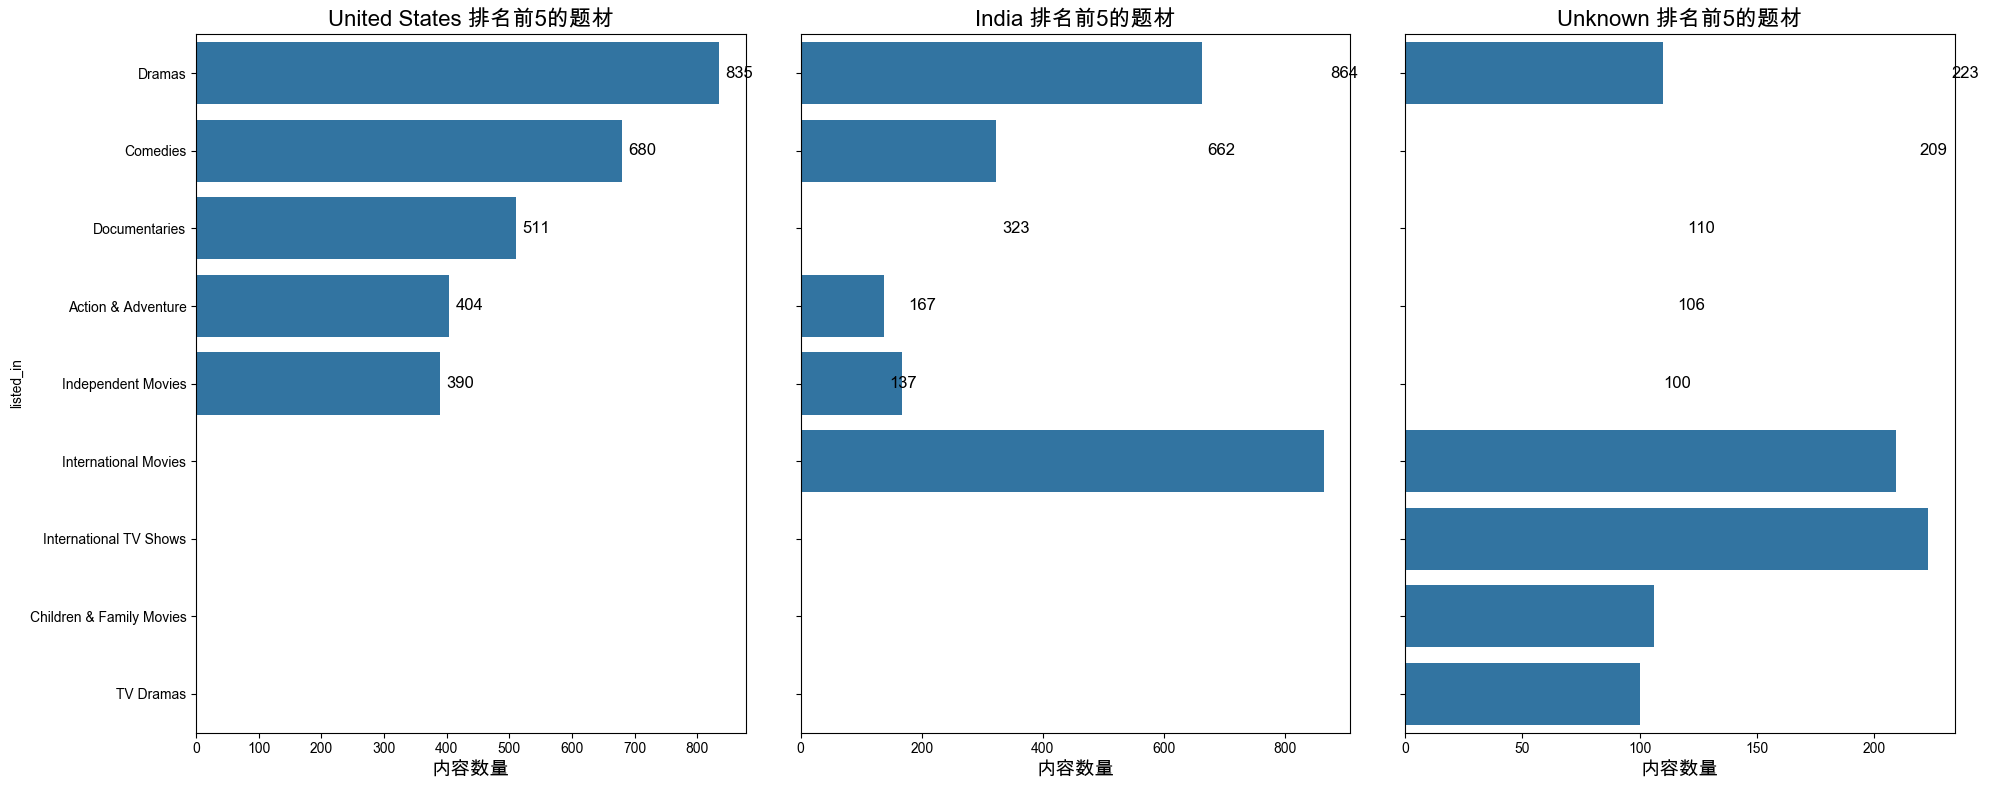

In [32]:
input_path = './netflix_titles_cleaned.csv'
df = pd.read_csv(input_path)

df['country'] = df['country'].str.split(', ')
df_exploded = df.explode('country')

country_counts = df_exploded['country'].value_counts()
top_3_countries = country_counts.head(3)

print("内容最多的前3个国家：")
print("-" * 50)
for country, count in top_3_countries.items():
    print(f"{country}: {count} 部内容")
print("-" * 50)

top_countries = top_3_countries.index.tolist()
df_exploded['listed_in'] = df_exploded['listed_in'].str.split(', ')
df_genres_exploded = df_exploded.explode('listed_in')

fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True)

for i, country in enumerate(top_countries):
    country_data = df_genres_exploded[df_genres_exploded['country'] == country]
    genre_counts = country_data['listed_in'].value_counts()
    top_5_genres = genre_counts.head(5)
    
    sns.barplot(
        x=top_5_genres.values,
        y=top_5_genres.index,
        ax=axes[i],
    )
    
    axes[i].set_title(f'{country} 排名前5的题材', fontsize=16, fontweight='bold')
    axes[i].set_xlabel('内容数量', fontsize=14)
    
    for j, v in enumerate(top_5_genres.values):
        axes[i].text(v + 10, j, str(v), va='center', fontsize=12)

plt.tight_layout()
plt.subplots_adjust(wspace=0.1)


print("\n各国排名前5的题材详细数据：")
print("=" * 70)
for country in top_countries:
    country_data = df_genres_exploded[df_genres_exploded['country'] == country]
    genre_counts = country_data['listed_in'].value_counts()
    top_5_genres = genre_counts.head(5)
    
    print(f"\n{country}:")
    print("-" * 30)
    for genre, count in top_5_genres.items():
        percentage = (count / len(country_data)) * 100
        print(f"{genre:<40}：{count:<10} 部 ({percentage:.1f}%)")

4. 电视剧季度数分析：仅筛选 type 为 "TV Show" 的数据，统计拥有 "1 Season", "2 Seasons" ... 等不同季度数的剧集数量，绘制条形图。分析 Netflix 上的剧集是否大多是短命的（只有 1-2 季）。

电视剧季度数分析：
总剧集数量：2674
1-2季的剧集数量：2216
1-2季剧集占比：82.9%

各季度数剧集数量分布：
----------------------------------------
1 季: 1791 部 (67.0%)
2 季: 425 部 (15.9%)
3 季: 199 部 (7.4%)
4 季: 95 部 (3.6%)
5 季: 65 部 (2.4%)
6 季: 33 部 (1.2%)
7 季: 23 部 (0.9%)
8 季: 17 部 (0.6%)
9 季: 9 部 (0.3%)
10 季: 7 部 (0.3%)
11 季: 2 部 (0.1%)
12 季: 2 部 (0.1%)
13 季: 3 部 (0.1%)
15 季: 2 部 (0.1%)
17 季: 1 部 (0.0%)

各季度范围剧集数量：
----------------------------------------
1-2季      ：1791       部 (67.0%)
3-5季      ：719        部 (26.9%)
6-10季     ：147        部 (5.5%)
10季以上     ：17         部 (0.6%)


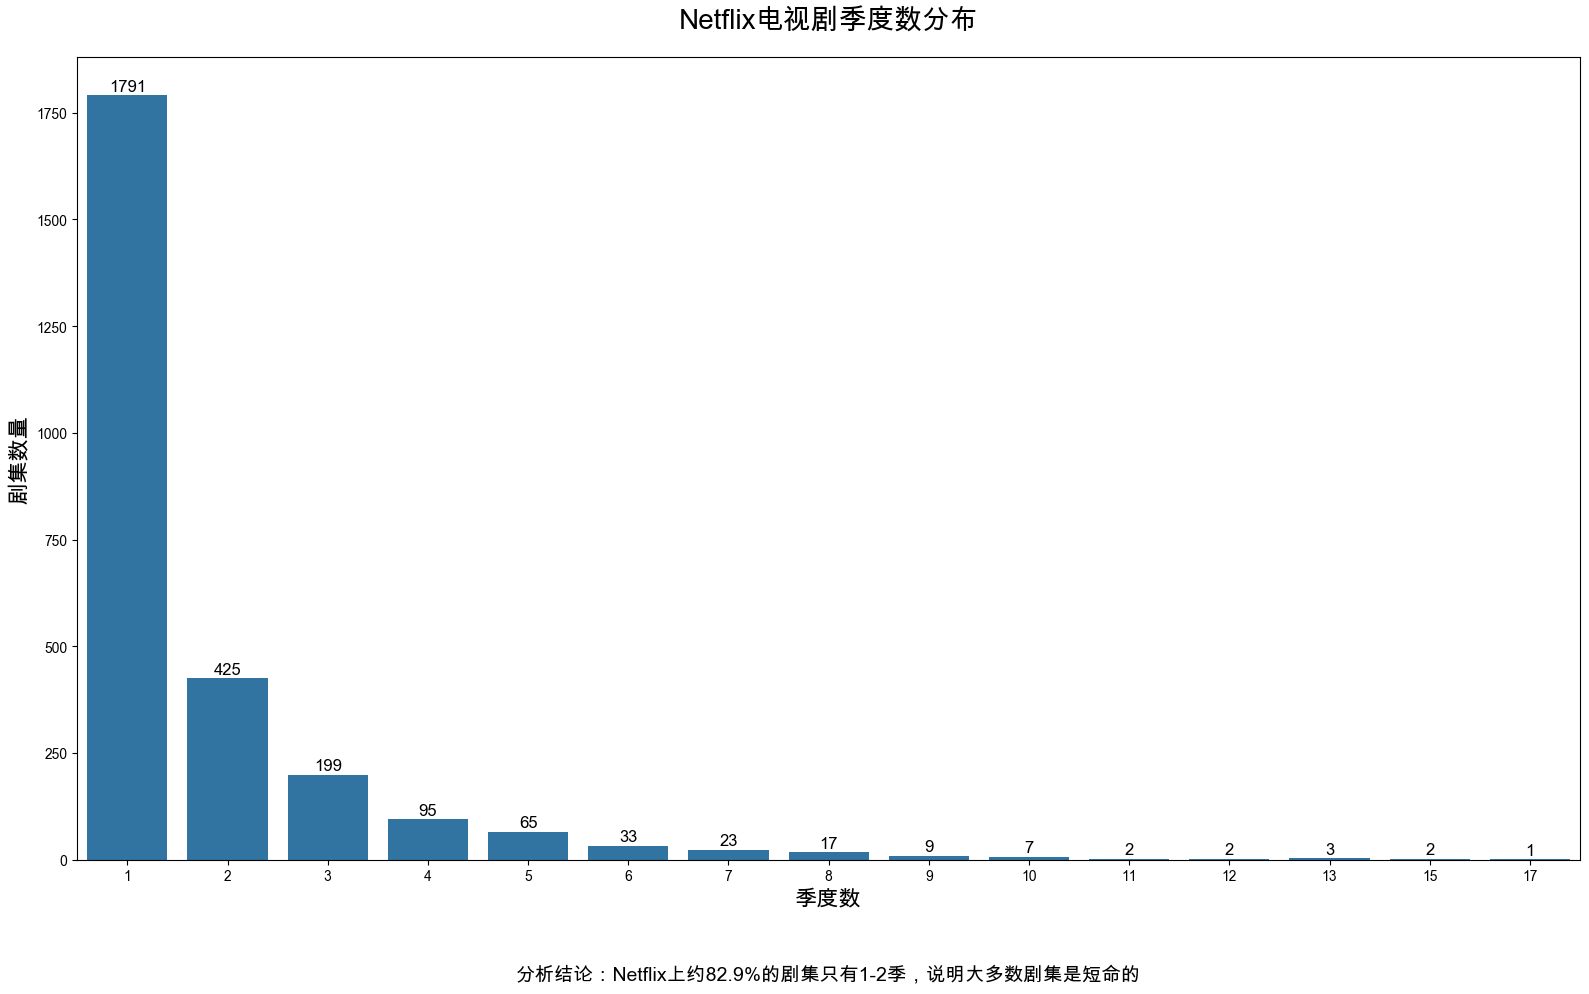

In [33]:
input_path = './netflix_titles_cleaned.csv'
df = pd.read_csv(input_path)

tv_df = df[df['type'] == 'TV Show'].copy()

if 'duration_num' not in tv_df.columns:
    tv_df['duration_num'] = tv_df['duration'].str.extract('(\d+)').astype(float)
    tv_df['season_count'] = tv_df['duration_num'].astype(int)
else:
    tv_df['season_count'] = tv_df['duration_num'].astype(int)

season_counts = tv_df['season_count'].value_counts().sort_index()

short_run_series = season_counts.loc[1:2].sum()
total_series = len(tv_df)
short_run_percentage = (short_run_series / total_series) * 100

print("电视剧季度数分析：")
print("=" * 50)
print(f"总剧集数量：{total_series}")
print(f"1-2季的剧集数量：{short_run_series}")
print(f"1-2季剧集占比：{short_run_percentage:.1f}%")
print("=" * 50)

print("\n各季度数剧集数量分布：")
print("-" * 40)
for season, count in season_counts.items():
    percentage = (count / total_series) * 100
    print(f"{season} {'季' if season == 1 else '季'}: {count} 部 ({percentage:.1f}%)")

# 绘制条形图
plt.figure(figsize=(16, 10))

top_seasons = season_counts.head(20)

bar_plot = sns.barplot(
    x=top_seasons.index,
    y=top_seasons.values,
)

# 设置标题和标签
plt.title('Netflix电视剧季度数分布', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('季度数', fontsize=16)
plt.ylabel('剧集数量', fontsize=16)

# 添加数值标签
for i, v in enumerate(top_seasons.values):
    plt.text(i, v + 10, str(v), ha='center', fontsize=12)

# 添加分析结论的文本注释
plt.text(
    0.5, -0.15, 
    f"分析结论：Netflix上约{short_run_percentage:.1f}%的剧集只有1-2季，说明大多数剧集是短命的", 
    ha='center', 
    fontsize=14, 
    fontweight='bold',
    transform=plt.gca().transAxes
)

# 调整布局
plt.tight_layout()


# 进一步分析：统计不同季度范围的剧集数量
season_bins = [0, 2, 5, 10, float('inf')]
bin_labels = ['1-2季', '3-5季', '6-10季', '10季以上']
tv_df['season_range'] = pd.cut(tv_df['season_count'], bins=season_bins, labels=bin_labels, right=False)
range_counts = tv_df['season_range'].value_counts().sort_index()

print("\n各季度范围剧集数量：")
print("-" * 40)
for season_range, count in range_counts.items():
    percentage = (count / total_series) * 100
    print(f"{season_range:<10}：{count:<10} 部 ({percentage:.1f}%)")

5. 演员与内容的关联：从cast 列中提取所有演员名字（需解决逗号分隔和列表展开的问题），统计出出现频率最高的10位演员。并用 seaborn绘制条形图，用颜色区分他们主要出演的是Movie还是TV Show（如果在两种类型都出现，归类为占比高的一方）。

出现频率最高的10位演员分析：
演员                             总出现次数           电影次数       电视剧次数           主要类型         占比    
--------------------------------------------------------------------------------
Unknown                        825             475        350             Movie        57.6%
Anupam Kher                    43              42         1               Movie        97.7%
Shah Rukh Khan                 35              35         0               Movie        100.0%
Julie Tejwani                  33              28         5               Movie        84.8%
Takahiro Sakurai               32              7          25              TV Show      78.1%
Naseeruddin Shah               32              32         0               Movie        100.0%
Rupa Bhimani                   31              27         4               Movie        87.1%
Akshay Kumar                   30              30         0               Movie        100.0%
Om Puri                        30              30         0   

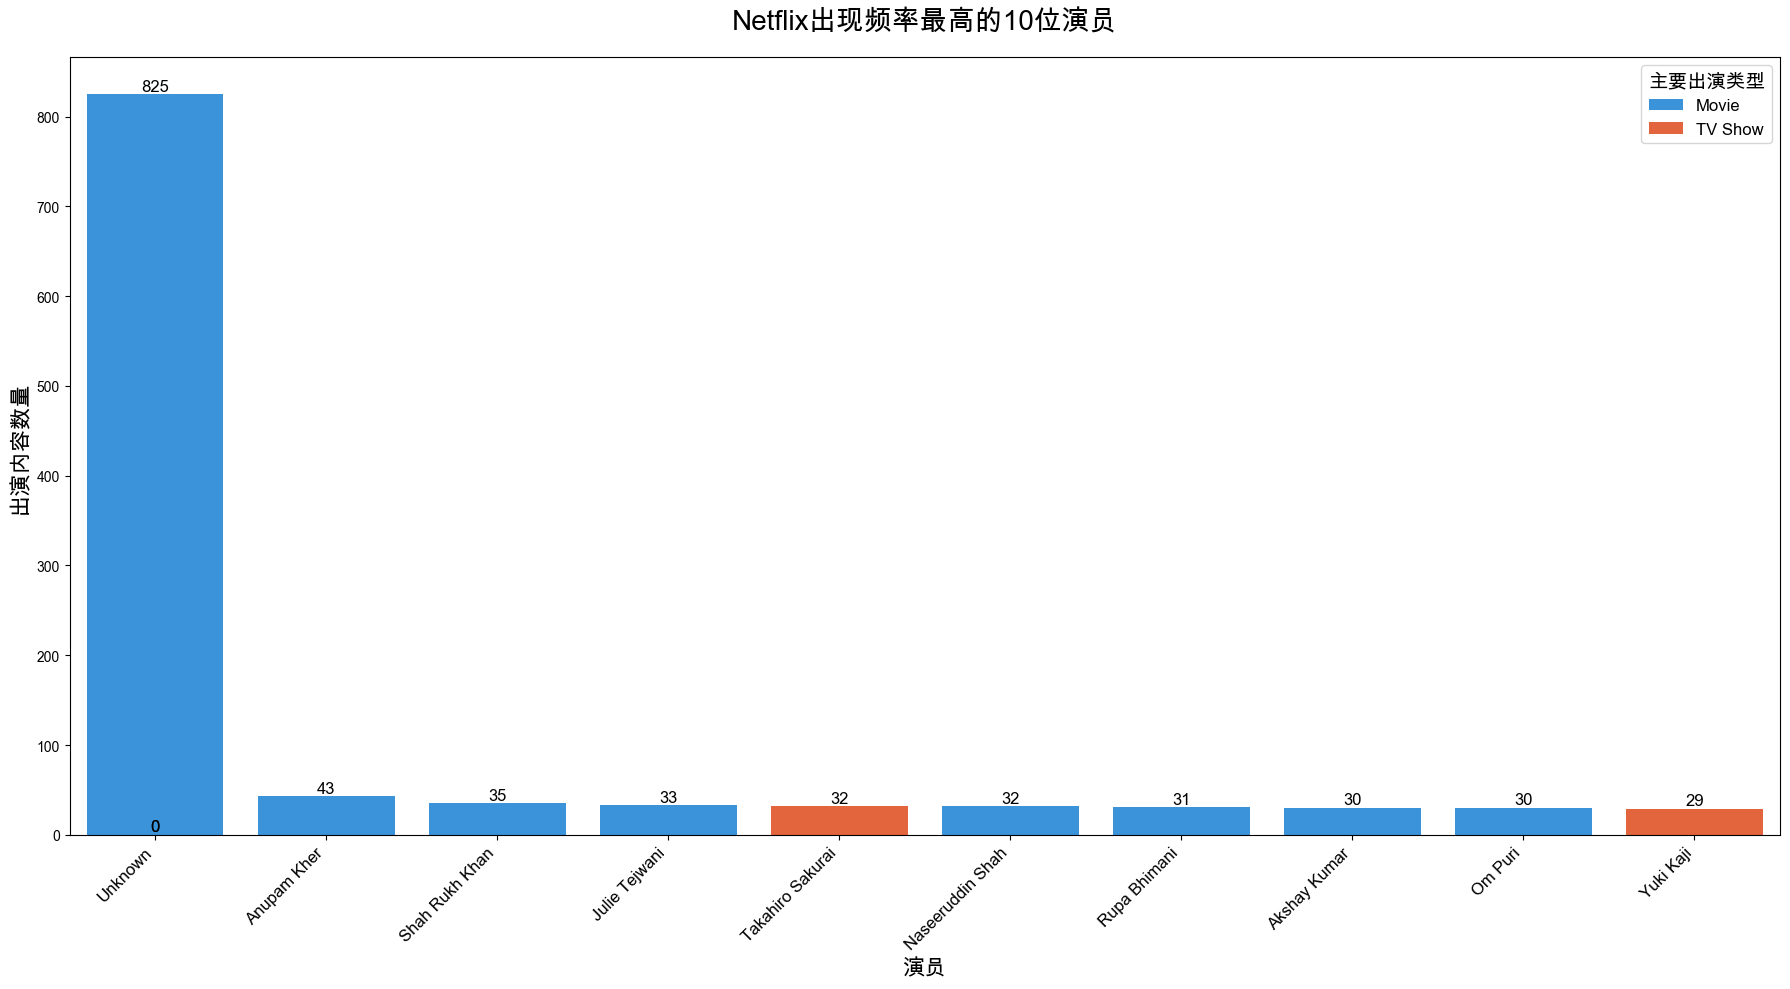

In [23]:
input_path = './netflix_titles_cleaned.csv'
df = pd.read_csv(input_path)

df['cast'] = df['cast'].str.split(', ')
df_cast_exploded = df.explode('cast')

df_cast_exploded = df_cast_exploded[df_cast_exploded['cast'].notna()]
top_10_actors = df_cast_exploded['cast'].value_counts().head(10)

actor_type_analysis = []
for actor in top_10_actors.index:
    actor_content = df_cast_exploded[df_cast_exploded['cast'] == actor]
    movie_count = len(actor_content[actor_content['type'] == 'Movie'])
    tv_count = len(actor_content[actor_content['type'] == 'TV Show'])
    total_count = movie_count + tv_count
    if movie_count > tv_count:
        primary_type = 'Movie'
        type_ratio = (movie_count / total_count) * 100
    elif tv_count > movie_count:
        primary_type = 'TV Show'
        type_ratio = (tv_count / total_count) * 100
    else:
        primary_type = 'Both'
        type_ratio = 50.0
    
    actor_type_analysis.append({
        'actor': actor,
        'total_count': total_count,
        'movie_count': movie_count,
        'tv_count': tv_count,
        'primary_type': primary_type,
        'type_ratio': type_ratio
    })

actor_analysis_df = pd.DataFrame(actor_type_analysis)
actor_analysis_df = actor_analysis_df.sort_values('total_count', ascending=False)
print("出现频率最高的10位演员分析：")
print("=" * 80)
print(f"{'演员':<30} {'总出现次数':<15} {'电影次数':<10} {'电视剧次数':<15} {'主要类型':<12} {'占比':<6}")
print("-" * 80)

for _, row in actor_analysis_df.iterrows():
    print(f"{row['actor']:<30} {row['total_count']:<15} {row['movie_count']:<10} {row['tv_count']:<15} {row['primary_type']:<12} {row['type_ratio']:.1f}%")

print("=" * 80)

plt.figure(figsize=(18, 10))
type_colors = {'Movie': '#2196F3', 'TV Show': '#FF5722', 'Both': '#9C27B0'}
bars = sns.barplot(
    data=actor_analysis_df,
    x='actor',
    y='total_count',
    hue='primary_type',
    palette=type_colors,
    dodge=False
)
plt.title('Netflix出现频率最高的10位演员', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('演员', fontsize=16)
plt.ylabel('出演内容数量', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)

for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.,
        height + 0.5,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=12
    )

plt.legend(title='主要出演类型', title_fontsize=14, fontsize=12, loc='upper right')
plt.tight_layout()

print("\n演员类型分布统计：")
print("-" * 40)
type_distribution = actor_analysis_df['primary_type'].value_counts()
for type_name, count in type_distribution.items():
    percentage = (count / len(actor_analysis_df)) * 100
    print(f"{type_name}: {count} 位演员 ({percentage:.1f}%)")